# Assignment 3

In [1]:
#imports
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import StandardScaler

# choose data
#path = 'data_200.csv'
#path = 'data_500.csv'
path = 'data_all.csv'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1: scatter plot

In [2]:
def add360(n): 
    if n < 0:
        return n +360
    return n

      residue name  position chain         phi         psi
0              LYS        10     A -149.312855  142.657714
1              PRO        11     A  -44.283210  136.002076
2              LYS        12     A -119.972621 -168.705263
3              LEU        13     A -135.317212  137.143523
4              LEU        14     A -104.851467   95.928520
...            ...       ...   ...         ...         ...
29364          GLY       374     B -147.749557  155.223562
29365          GLN       375     B -117.428541  133.019506
29366          ILE       376     B -113.586448  112.091970
29367          ASN       377     B -100.668779  -12.102821
29368          LYS       378     B -169.951240   94.233680

[29369 rows x 5 columns]


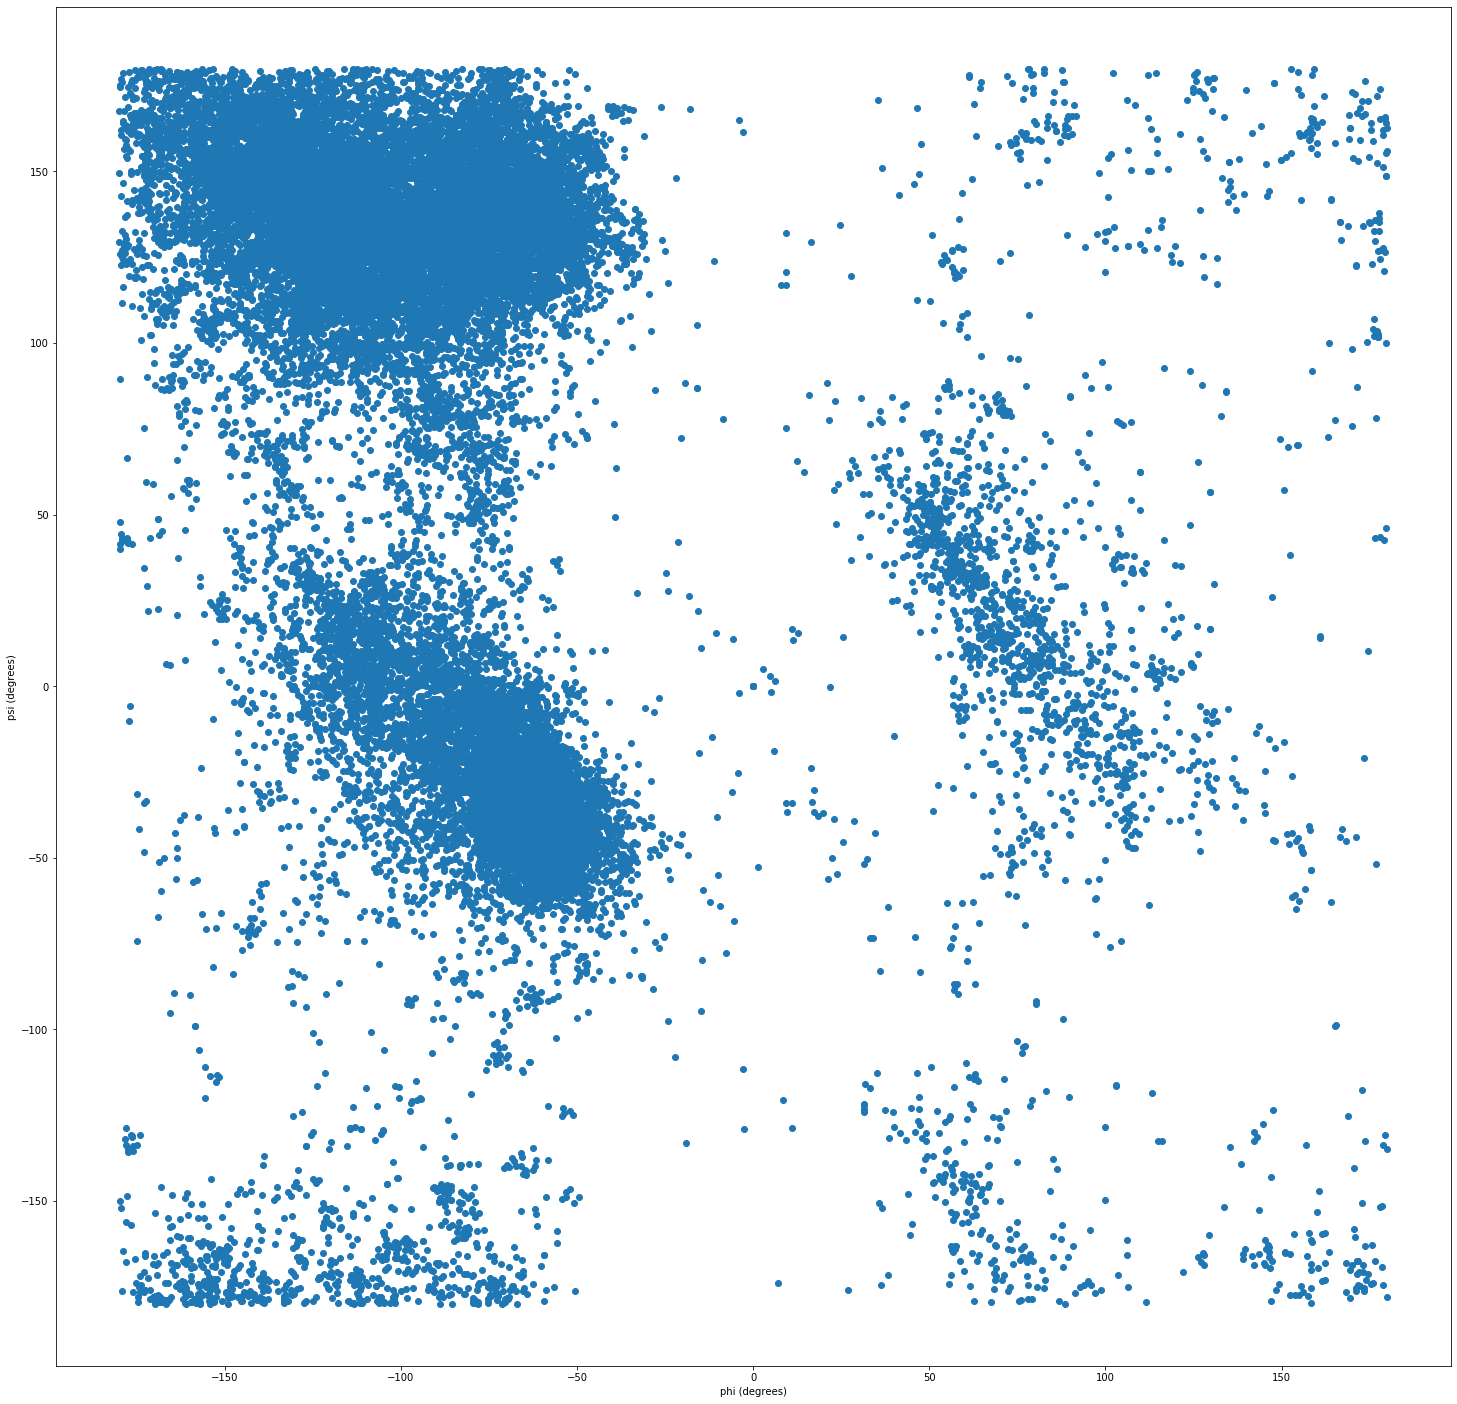

In [3]:
# read data
df = pd.read_csv(path)

#df['phi'] = df['phi'].map( lambda n: add360(n))  # 2.d: Shifting data for better results
#df['psi'] = df['psi'].map( lambda n: add360(n + 100)) # # 2.d: Shifting data for better results

# print data
print(df)

# scatter plot data
x = df['phi']
y= df['psi']
X = df[['phi','psi']]
plt.figure(figsize=(25,25))
plt.scatter(x, y)
# add labels
plt.xlabel('phi (degrees)')
plt.ylabel('psi (degrees)')
plt.show()

## 2: K means clustering

### 2.a: Try different k values

In [4]:
def drawClusters(k): # k = # clusters
    # create clusters
    kmeans = KMeans(n_clusters=k, random_state=7).fit(X)
    
    plt.figure(figsize=(25,25))
    
    predict = kmeans.predict(X)
    
    # draw data points
    plt.scatter(x, y, c=predict)

    # draw cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

In [5]:
# k = 1
#drawClusters(1)

In [6]:
# k = 2
#drawClusters(2)

In [7]:
# k = 3
#drawClusters(3)

In [8]:
# k = 4
#drawClusters(4)

In [9]:
# k = 5
#drawClusters(5)

In [10]:
#k = 6
#drawClusters(6)

In [11]:
#k = 7
#drawClusters(7)

In [12]:
#k = 8
#drawClusters(8)

We can assume there are 4 underlying clusters by looking at the scatter plot of the data, meaning k=4 is suitable. The clusters appear to be spread about some center point somewhat uniformly, meaning k-means clustering would be suitable here. DBSCAN could probably also work since the clusters aren't very close to each other. No two different clusters are centered around the same point in any part (wither locally or overall) though, meaning DBSCAN is not needed to separate the clusters.

### 2.b: Validate clusters

### 2.c: Reason about clusters in 2.a
To expand on the the reasoning in 2.a, the centers for the cluster found using k-means with k=4 do all seem to be in the center for each cluster.

### 2.d: Shifting data for better results

In [13]:
df['phi'] = df['phi'].map( lambda n: add360(n))  # 2.d: Shifting data for better results
df['psi'] = df['psi'].map( lambda n: add360(n + 100)) # # 2.d: Shifting data for better results

x = df['phi']
y= df['psi']
X = df[['phi','psi']]

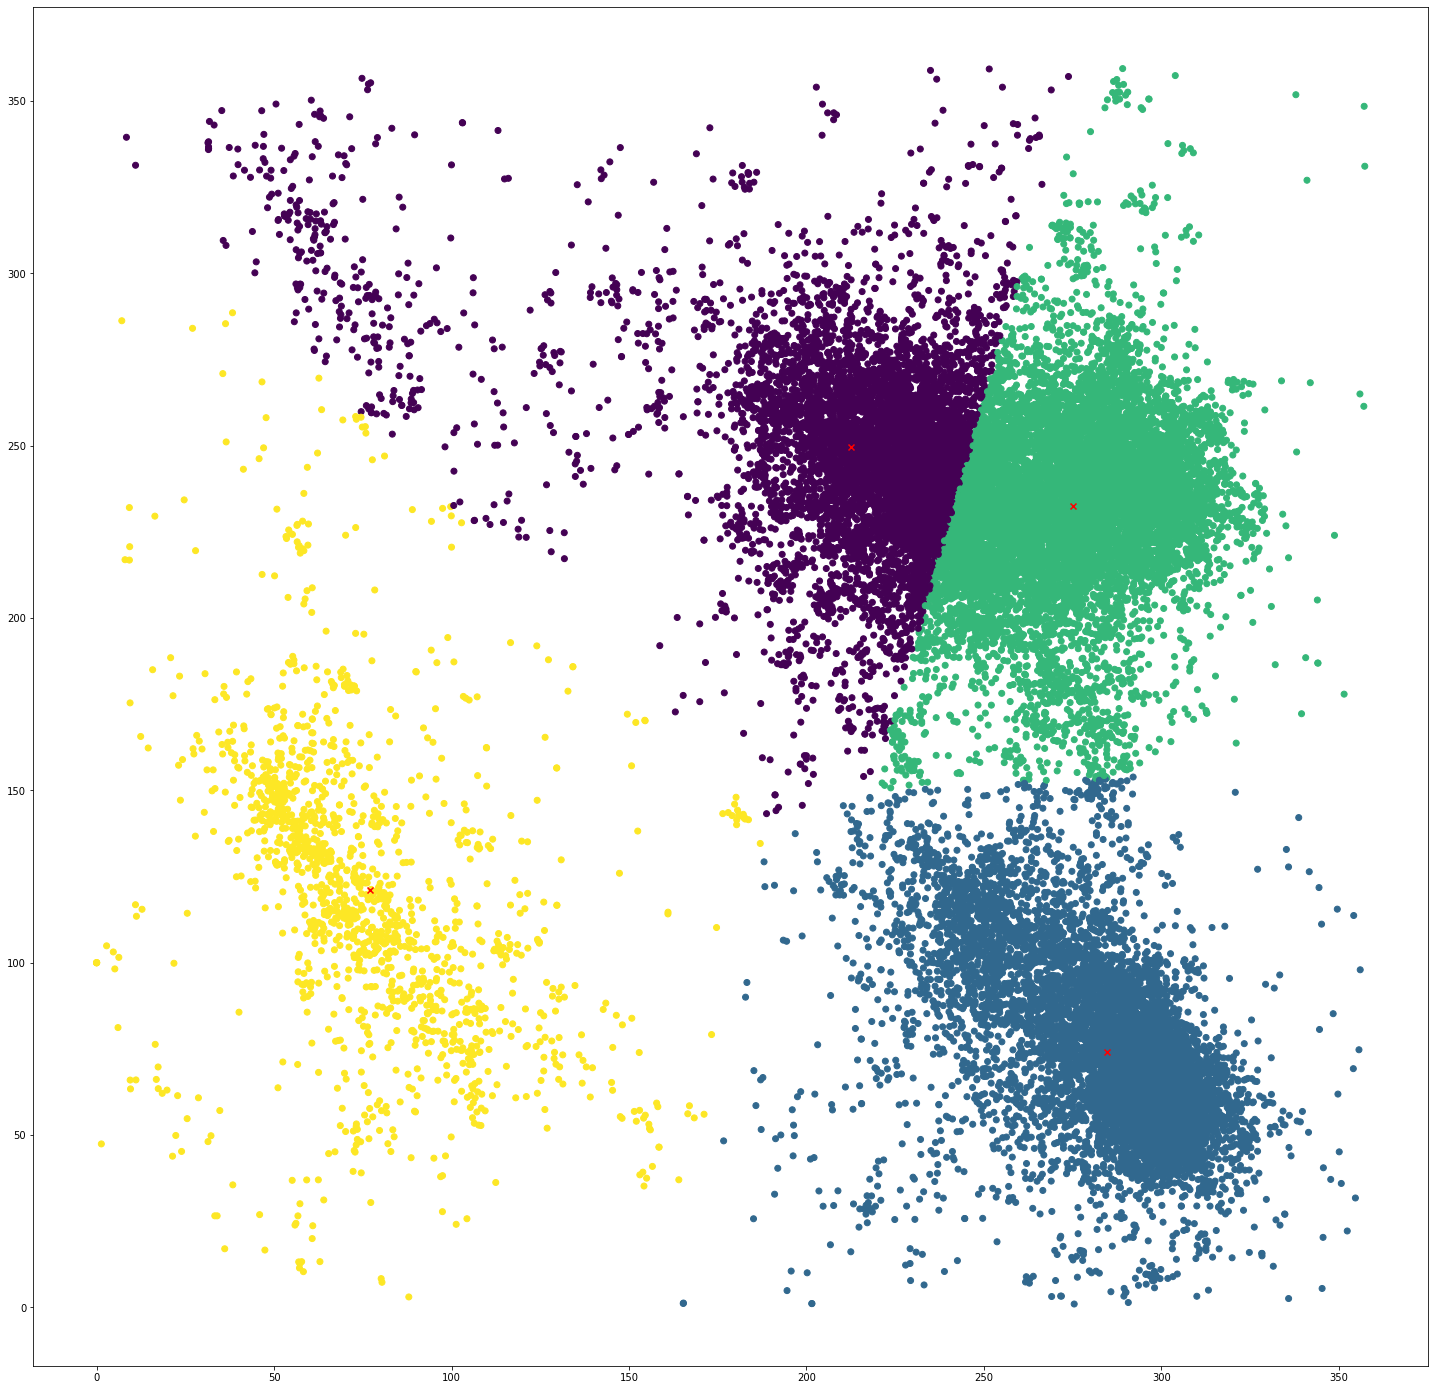

In [14]:
#k = 4
drawClusters(4)

In [15]:
#k = 5
#drawClusters(5)

In [16]:
#k = 6
#drawClusters(6)

## 3: DBSCAN clustering

In [17]:
# start point for centers
centers = [[1, 1], [-1, -1], [1, -1]]

X = StandardScaler().fit_transform(X)


In [18]:
# help function for drawing dbscans for given max distance and min sample
def drawDBSCAN(max_distance, min_samples):
    # Compute DBSCAN
    db = DBSCAN(max_distance, min_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

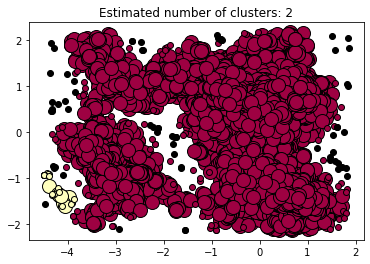

Estimated number of clusters: 2
Estimated number of noise points: 65


In [19]:
drawDBSCAN(0.3,15)

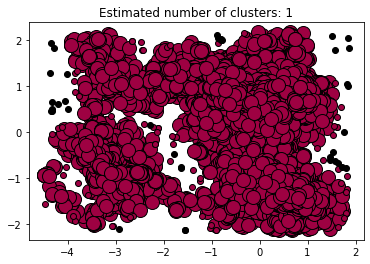

Estimated number of clusters: 1
Estimated number of noise points: 38


In [20]:
drawDBSCAN(0.3,10)

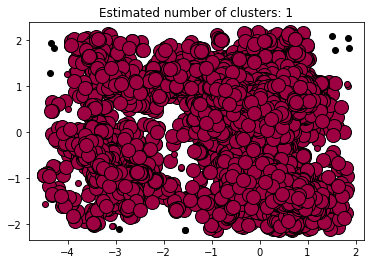

Estimated number of clusters: 1
Estimated number of noise points: 10


In [21]:
drawDBSCAN(0.3,5)

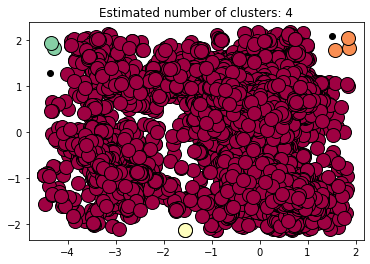

Estimated number of clusters: 4
Estimated number of noise points: 2


In [22]:
drawDBSCAN(0.3,2)

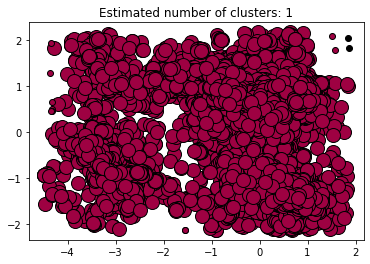

Estimated number of clusters: 1
Estimated number of noise points: 2


In [23]:
drawDBSCAN(0.6,15)

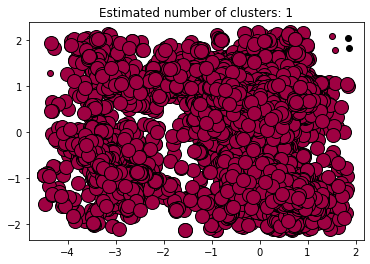

Estimated number of clusters: 1
Estimated number of noise points: 2


In [24]:
drawDBSCAN(0.6,10)

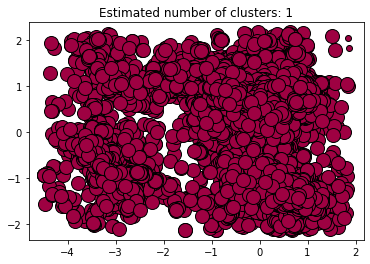

Estimated number of clusters: 1
Estimated number of noise points: 0


In [25]:
drawDBSCAN(0.6,5)

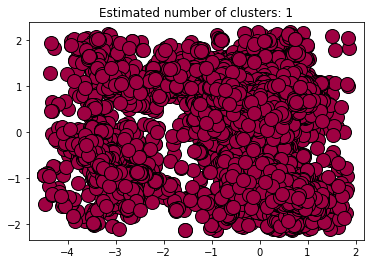

Estimated number of clusters: 1
Estimated number of noise points: 0


In [26]:
drawDBSCAN(0.6,2)

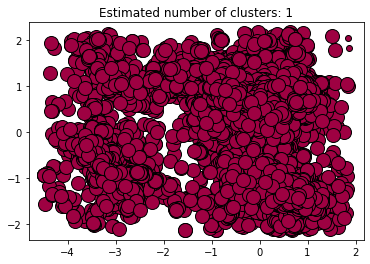

Estimated number of clusters: 1
Estimated number of noise points: 0


In [27]:
drawDBSCAN(0.9,15)

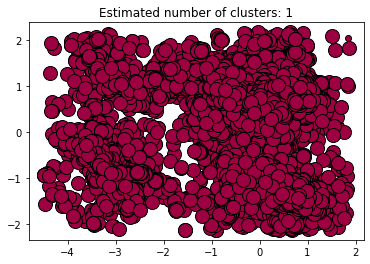

Estimated number of clusters: 1
Estimated number of noise points: 0


In [28]:
drawDBSCAN(0.9,10)

In [ ]:
drawDBSCAN(0.9,5)

In [ ]:
drawDBSCAN(0.9,2)

### 3.a: Motivate min samples & max distance

### 3.b: Visualization and outliers

### 3.c: Compare DBSCAN and k means clusters
A strength of DBSCAN is that it can omitt points that are too close to 2 different clusters, meaning it's too hard to tell which cluster they should belong to. This can make the clusters have higher accuracy but it can also be a downside if you absolutely need all points to be classified, even at the cost of some inaccuracy.

### 3.d: Robustness of DBSCAN

## 4: Comparison of clusters